# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
plt.style.use('ggplot')

# Load and Visualize Dat

In [2]:
df = pd.read_csv('datasets/neural-data.csv')
df.head()

,x1,x2,label
0,0.39,0.00,0
1,1.39,0.00,0
2,1.46,-0.04,0
3,1.74,-0.07,0
4,1.93,-0.04,0


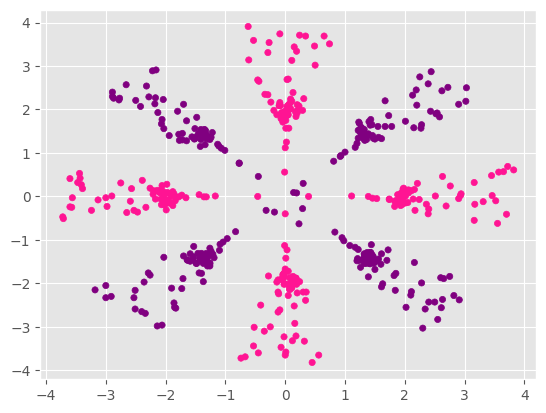

In [3]:
plt.scatter(df["x1"], df["x2"], c=df["label"], cmap=ListedColormap(["deeppink", "purple"]), s=20)
plt.show()

In [4]:
X = df.drop("label", axis=1).values
y = df["label"].values

In [5]:
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (500, 2)
y.shape: (500,)


But for neural networks, training example should be in horizondal direction and the feature must be in vertical direction 

In [6]:
X = X.T
y = y.reshape(1,500)

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X.shape: (2, 500)
y.shape: (1, 500)


# Helper Functions

In [11]:
def initialize_parameters(layer_dims):
    """
    layer_dims will be a list containing --> [# inputs, # neurons in hidden layer 1, ...., # neurons in hidden layer n, # outputs]
    example: layer_dims = [2, 3, 4, 1]
    """
    parameters = {}
    for l in range (1,len(layer_dims)):          # skips zero so starts with first hidden layer
        parameters[f"W{l}"] = np.random.rand(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters[f"B{l}"] = np.zeros((layer_dims[l],1))

    return parameters

In [18]:
# Uncomment and Run the below to visualize the parameters
# initialize_parameters([2, 3, 4, 1]) 